Katmanlar ve CNN Mimarisi: Evrişim, Havuzlama, Tam Bağlantılı Katmanlar

---

### a. CNN Nedir? Neden Görüntü İşleme İçin Kritik?

**CNN (Convolutional Neural Network)**, yani **Evrişimli Sinir Ağı**, görüntü sınıflandırma, nesne tespiti, yüz tanıma gibi görevlerde en sık kullanılan derin öğrenme mimarisidir.

Geleneksel sinir ağları (örneğin MLP) bir görüntüyü düz bir vektöre çevirir ve tüm pikselleri eşit öneme sahip kabul eder. Bu, görüntüdeki **uzamsal yapıyı (yani piksellerin konum ilişkileri)** yok sayar.

CNN ise bu sorunu çözer:

- **Evrişim katmanları** ile yerel özellikleri (kenarlar, dokular) otomatik çıkarır.
- **Havuzlama katmanları** ile boyutu azaltır, hesaplama yükünü düşürür.
- **Tam bağlantılı katmanlar** ile son sınıflandırmayı yapar.

> 🔍 Gerçek Yaşam Örneği: Bir cep telefonu, kameranızla bir köpeği tanıdığında (örneğin Google Lens), arka planda çalışan bir CNN modeli vardır. Bu model, önce köpeğin kulaklarını, burnunu, tüy dokusunu algılar, sonra "bu bir Golden Retriever" der.
> 

---

### b. CNN Mimarisinin Temel Katmanları

Bir CNN mimarisi genellikle şu katmanlardan oluşur:

| Katman Türü | Görevi | Özellik |
| --- | --- | --- |
| **Giriş Katmanı** | Görüntüyü alır | Örnek: 224x224x3 (RGB) |
| **Evrişim (Convolution) Katmanı** | Özellik haritaları (feature maps) üretir | Filtreler (çekirdekler) kullanır |
| **Aktivasyon Katmanı** | Doğrusal olmayanlığı ekler | Genellikle ReLU kullanılır |
| **Havuzlama (Pooling) Katmanı** | Boyutu azaltır, varyasyona direnç sağlar | Max Pooling yaygındır |
| **Düzleştirme (Flatten)** | 2D veriyi 1D vektöre çevirir | Tam bağlantılı katmana hazırlar |
| **Tam Bağlantılı (Fully Connected) Katman** | Sınıflandırma yapar | Softmax ile olasılık üretir |

---

### c. Evrişim Katmanı: Özellikleri Otomatik Öğrenme

Evrişim katmanı, görüntü üzerinde kayan filtreler uygular. Ancak burada **filtreler sabit değildir**, model eğitim sırasında bu filtreleri **kendi kendine öğrenir**.

Örneğin:

- İlk evrişim katmanı: Kenar, çizgi, açı gibi basit şekilleri tespit eder.
- İkinci katman: Göz, kulak, tekerlek gibi daha karmaşık yapıları birleştirir.
- Son katmanlar: Nesnenin tamamını (köpek, araba) tanır.

> 💡 Anahtar Fark: Geleneksel filtreler (Sobel, Prewitt) sabittir. CNN’de filtreler öğrenilebilir parametrelerdir.
> 

---

### d. Aktivasyon Fonksiyonu: ReLU

Evrişimden sonra **ReLU (Rectified Linear Unit)** fonksiyonu uygulanır:

f(x)=max(0,x)

Bu fonksiyon:

- Negatif değerleri sıfırlar.
- Doğrusal olmayanlığı sağlar.
- Eğitim sürecini hızlandırır.

---

### e. Havuzlama (Pooling) Katmanı: Boyut Azaltma

Havuzlama katmanı, özellik haritalarının boyutunu azaltır. Bu, hesaplama yükünü düşürür ve modele bir miktar **konumsal varyasyona karşı direnç** kazandırır.

En yaygın türü: **Max Pooling**

### f. Düzleştirme ve Tam Bağlantılı Katman

- **Düzleştirme (Flatten)**: 3D özellik haritaları (yükseklik × genişlik × kanal) 1D bir vektöre çevrilir.
- **Tam Bağlantılı Katman (Dense)**: Bu vektör, geleneksel bir sinir ağı katmanına girer.
- **Çıkış Katmanı**: Sınıf sayısına göre nöron sayısı belirlenir. Örneğin 10 sınıf varsa, 10 nöron + Softmax aktivasyonu.

Softmax fonksiyonu, çıktıları 0-1 arası olasılıklara dönüştürür:

σ(zi)=∑jezjezi

## Örnek Uygulama Keras (Tensorflow ile)

In [6]:
# Kütüphanelerin Eklenmesi
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()


In [7]:
x_train = x_train.astype('float32') / 255.0 # değerleri 0 - 1 arasında normalize et
x_test = x_test.astype('float32') / 255.0

In [8]:
# Görüntülere kanal boyutu eklemek için 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [9]:
# etiketleri kategorik hale getir. 
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000, 10))

# Model mimarisini tanımlama

In [ ]:
# Modeli Oluştur
model = models.Sequential()

# 1. Evrişim Katmanı
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

# 2. Evrişim Katmanı
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# 3. Evrişim katmanı

model.add(layers.Conv2D(64,(3,3),activation='relu'))

# 4. Düzleştirme ve tam bağlantılı katmanlar
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modeli Derle
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Modeli Eğit

history = model.fit(x_train,y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test,y_test),
                    verbose=1)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9566 - loss: 0.1425 - val_accuracy: 0.9862 - val_loss: 0.0402
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9900 - val_loss: 0.0298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9901 - val_loss: 0.0288
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9910 - val_loss: 0.0263


NameError: name 'lt' is not defined

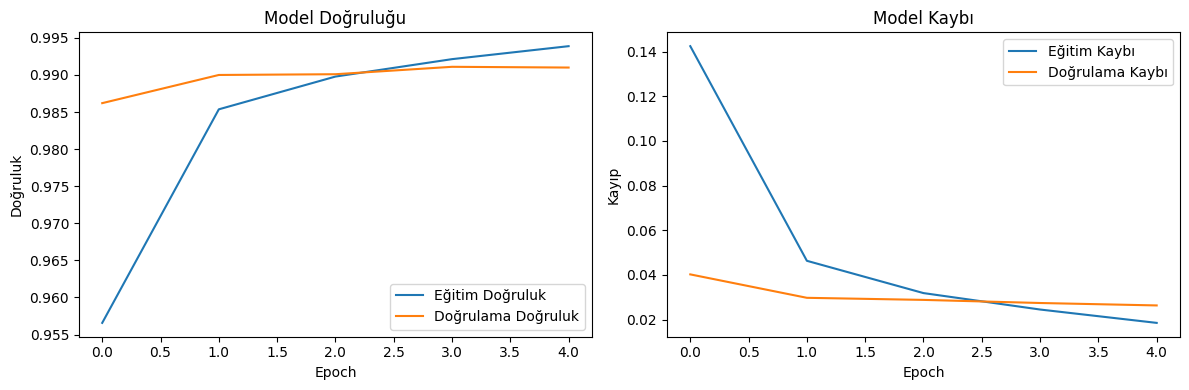

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluk')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluk')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


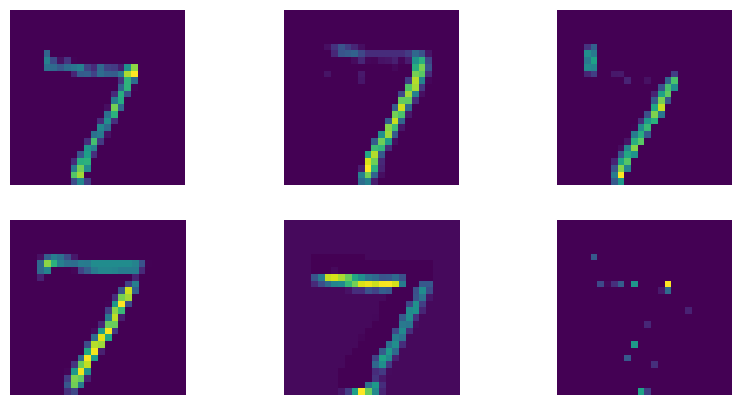

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = models.Model(inputs=model.inputs,outputs=layer_outputs)

img = x_test[0].reshape(1,28,28,1)
activations = activation_model.predict(img)

filter_layer_activate = activations[0]
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(filter_layer_activate[0,:,:,i],cmap='viridis')
    plt.axis('off')
plt.suptitle("İlk Evrişim Katmanı - Özellik Haritaları")
